<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko) and Vadim Shestopalov (@vchulski). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.


## <center>Разведывательный анализ данных в Pandas (история олимпийских игр)

Данные содержат следующие признаки:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [38]:
data = pd.read_csv(
    'https://raw.githubusercontent.com/rogovich/Data/master/data/olympics/athlete_events.csv')
data.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


_Hint:_ возможно, в некоторых случаях нужно избавиться от дубликатов, чтобы учитывать одного атлета только один раз. Ниже пример как это сделать. Например, удалим все дубликаты атлетов.


In [39]:
display(data.shape[0])
display(data.drop_duplicates('Name').shape[0])


271116

134732

Можно удалять полные дубликаты, а можно дубликаты по нескольким колонкам (например, удалять не все дубликаты атлетов, а оставлять одно упоминание атлета для каждых игр)


In [40]:
display(data.shape[0])  # всего атлетов

# всего атлетов, если не учитывать записи с одинаковым именем для одинаковых игр
display(data.drop_duplicates(['Name', 'Games']).shape[0])

# всего атлетов, если не учитывать дубликаты по имени, росту и возрасту
display(data.drop_duplicates(['Name', 'Age', 'Height']).shape[0])


271116

187297

187059

Обратите внимание, что данный метод не перезаписывает данные, поэтому, чтобы сохранить измененный датафрейм, нужно записать его в переменную.


**1. Сколько лет было самым молодым участникам (мужчина и женщина) олимпийских игр в 1992 году?**


In [41]:
maleMinAge = data[data['Sex'] == 'M']['Age'].min()
femaleMinAge = data[data['Sex'] == 'F']['Age'].min()

print('M min age is ', maleMinAge)

print('F min age is ', femaleMinAge)


M min age is  10.0
F min age is  11.0


**2. Какую пропорцию составляют мужчины-баскетболисты среди всех участников игр 2012 года. Округлите ответ до двух знаков.**


In [42]:
print('Столько процентов:', (float(((data['Sport'] == 'Basketball') & (
    data['Sex'] == 'M')).sum()) / data.shape[0]) * 100)


Столько процентов: 1.209814249251243


**3. Найдите среднее и стандартное отклонение для роста теннисисток (большой теннис), которые участвовали в играх 2000 года. Округлите ответ до второго знака.**


In [43]:
fTennis = data[(data['Sport'] == 'Tennis') & (
    data['Sex'] == 'F') & (data['Year'] == 2000)]['Height']
print(
    " Среднее - ", round(fTennis.mean()), '\n',
    "Стд отклонение - ", round(fTennis.std(), 1)
)


 Среднее -  172 
 Стд отклонение -  6.5


**4. Выведите названия всех уникальных дисциплин, связанных с катанием на коньках (Skating). Посчитайте их количество**


In [44]:
skating = data[data['Event'].str.contains(r'Skating')]
skating = skating.drop_duplicates(['Event'])['Event']
skating


4                         Speed Skating Women's 500 metres
5                       Speed Skating Women's 1,000 metres
83                          Speed Skating Men's 500 metres
84                        Speed Skating Men's 1,500 metres
112                       Speed Skating Men's 5,000 metres
115                      Speed Skating Men's 10,000 metres
265                           Figure Skating Men's Singles
278                              Figure Skating Mixed Team
778                             Figure Skating Mixed Pairs
973                     Speed Skating Women's 1,500 metres
974            Speed Skating Women's Team Pursuit (6 laps)
993                         Figure Skating Women's Singles
998                       Speed Skating Men's 1,000 metres
2013                      Figure Skating Mixed Ice Dancing
2848     Short Track Speed Skating Men's 5,000 metres R...
4132                    Speed Skating Women's 3,000 metres
4880     Short Track Speed Skating Women's 3,000 metres.

In [45]:
len(skating)


27

**5. Найдите самую легкую атлетку игр 2006 года. В каком виде спорта она участвовала?**


In [46]:
lightest = data[['Sport', 'Weight', 'Name']][(
    data['Year'] == 2006) & (data['Sex'] == 'F')]
lightest = lightest[lightest['Weight'] == lightest['Weight'].min()]
lightest


,Sport,Weight,Name
188177,Figure Skating,38.0,Phyo Yong-Myong


**6. В скольких олимпиадах принимал участие John Aalberg?**


In [47]:

john = data.drop_duplicates(['Name', 'Games'])[data['Name'] == 'John Aalberg']
print(john.shape[0])


2


C:\Users\alexd\AppData\Local\Temp\ipykernel_10528\4028733787.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  john = data.drop_duplicates(['Name', 'Games'])[data['Name'] == 'John Aalberg']


**7. Сколько золотых медалей настольном теннисе выиграл Китай на Олимпиаде в 2008 году?**


In [48]:
china = data[(data['Sport'] == 'Table Tennis') & (data['Team'] == 'China') & (
    data['Medal'] == 'Gold') & (data['Year'] == 2008)].shape[0]
china


8

**8. Правда ли, что Испания выиграла меньше медалей чем Италия на играх 2016 года? Ну учитывайте NaN в колонке _Medal_.**


In [49]:
dt = data[((data['Team'] == 'Spain') | (data['Team'] == 'Italy'))
          & (data['Year'] == 2016)]
dt = dt.dropna(subset=['Medal'])
spain = dt[dt['Team'] == 'Spain'].shape[0]
italy = dt[dt['Team'] == 'Italy'].shape[0]

print(spain < italy)


True


**9. Найдите самую многочисленную и самую малочисленную группу по возрасту среди всех участников игр (разбейте возраст по 10 лет).**


In [50]:
maxGroup = 0
minGroup = 10000000


for i in range(9):
    temp = data[(data['Age'] >= i*10) & (data['Age'] <= (i+1)*10)].shape[0]
    print(temp)
    if temp > maxGroup:
        maxGroup = temp
        maxId = i
    if temp < minGroup:
        minGroup = temp
        minId = i
print(
    'Самая многочисленная -', maxId*10, '-', (maxId+1)*10, '\n',
    'Самая малочисленная -', minId*10, '-', (minId+1)*10,
)


1
47561
187232
43894
6973
1646
557
121
9
Самая многочисленная - 20 - 30 
 Самая малочисленная - 0 - 10


**10. Проводились ли летние олимпийские игры в Atlanta? А зимние в Squaw Valley? Верните True или False**


In [51]:
display((data['City'] == 'Atlanta').any())
display(((data['City'] == 'Squaw Valley') &
        data['Games'].str.contains(r'Winter')).any())


True

True

**11. Найдите абсолютную разницу между количеством уникальных видов спорта на играх в 1988 году и в 2002**


In [52]:
sp1988 = data[data['Year'] == 1988]
sp2002 = data[data['Year'] == 2002]

print(abs(sp1988.drop_duplicates(
    subset=['Sport']).shape[0] - sp2002.drop_duplicates(subset=['Sport']).shape[0]))


22


**12. Найдите, в каких годах проводились соревнования по керлингу** (по керлингу чето не ищет посмотрю Speed Skating)


In [53]:
curling = data[data['Sport'] == 'Curling']
display(curling.drop_duplicates(subset='Year')['Year'])


1366     2006
1519     2014
2397     1924
7358     1998
7811     2010
14488    2002
Name: Year, dtype: int64

**13. Постройте распределение возраста керлингистов (мужчик), участвовавших в олимпиаде в Sochi**


<AxesSubplot:>

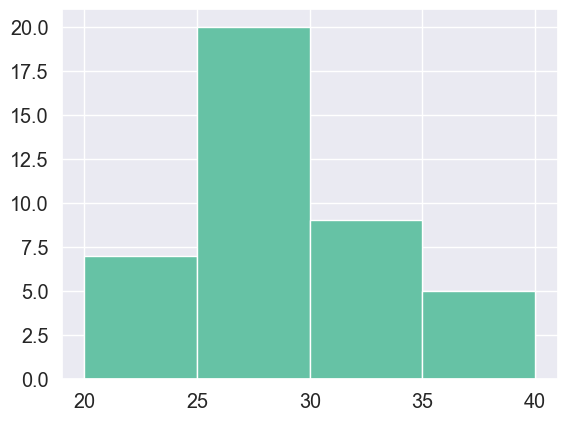

In [54]:
curling = curling[(curling['City'] == 'Sochi') & (curling['Sex'] == 'M')]
curling['Age'].hist(bins=[20, 25, 30, 35, 40])


**14. Выведите бар-чарт для медалей (золотые, серебряные и бронзовые) для Australia за всю историю зимних олипиад**


<AxesSubplot:>

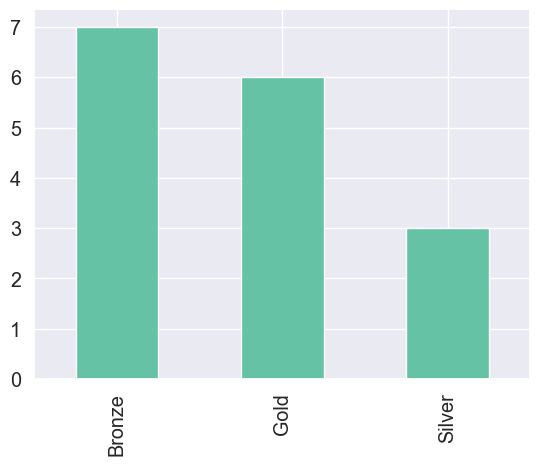

In [55]:
data[(data['Team'] == 'Australia') & (data['Season'] == 'Winter') & (
    data['Medal'].notna())]['Medal'].value_counts().plot(kind='bar')


**15. Выведете всех уникальных спортсменов с фамилией Belov и посчитайте их количество. Заодно обратите внимание, как обозначен в данных СССР.**


In [56]:
belovs = data[data['Name'].str.contains('Belov')]
belovs = belovs.drop_duplicates(subset='Name')
belovs = belovs[belovs['Sex'] == 'M']

print(belovs.shape[0], '\n')
belovs


8 



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
18470,9779,Aleksandr Aleksandrovich Belov,M,20.0,200.0,100.0,Soviet Union,URS,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Gold
18472,9780,Aleksandr Belov,M,20.0,182.0,60.0,Russia,RUS,2002 Winter,2002,Winter,Salt Lake City,Ski Jumping,"Ski Jumping Men's Normal Hill, Individual",NaN
18474,9781,Anton Sergeyevich Belov,M,27.0,192.0,92.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
18475,9782,Nikolay Grigoryevich Belov,M,32.0,NaN,NaN,Soviet Union,URS,1952 Summer,1952,Summer,Helsinki,Wrestling,"Wrestling Men's Middleweight, Greco-Roman",Bronze
18476,9783,Sergey Aleksandrovich Belov,M,24.0,190.0,82.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Basketball,Basketball Men's Basketball,Bronze
18480,9784,Vladimir Borisovich Belov,M,22.0,195.0,92.0,Soviet Union,URS,1980 Summer,1980,Summer,Moskva,Handball,Handball Men's Handball,Silver
18481,9785,Yevgeny Nikolayevich Belov,M,23.0,185.0,78.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Men's 15 kilometres,NaN
18483,9786,Yury Vladimirovich Belov,M,23.0,183.0,120.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Athletics,Athletics Men's Shot Put,NaN


**16. Постройте тренд общего количества медалей по годам на летних играх за всю историю участия СССР.**

Так как в командных видах спорта медали получают все члены команды, нужно удалить дубликаты соревнования, в котором получена медаль. Так соревнования могут повторяться, если представители страны выиграли медали разного достоинста, то эту операцию нужно проделать отдельно для всех типов медалей, а затем просуммировать.


<AxesSubplot:xlabel='Year'>

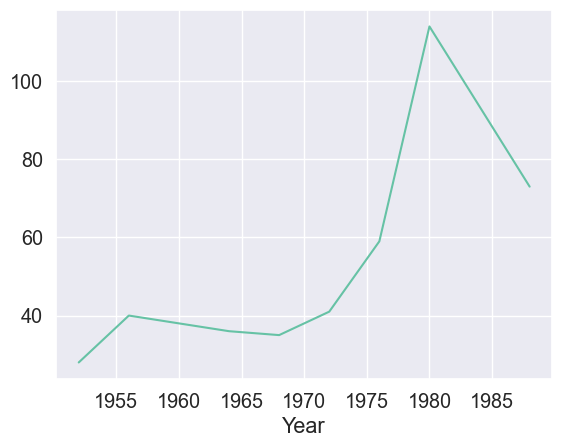

In [57]:
gold = data[(data['Team'] == 'Soviet Union') & (data['Season'] == 'Summer')
            & (data['Medal'] == 'Gold')].drop_duplicates('Event').groupby('Year').size()
silver = data[(data['Team'] == 'Soviet Union') & (data['Season'] == 'Summer')
              & (data['Medal'] == 'Silver')].drop_duplicates('Event').groupby('Year').size()
bronze = data[(data['Team'] == 'Soviet Union') & (data['Season'] == 'Summer')
              & (data['Medal'] == 'Bronze')].drop_duplicates('Event').groupby('Year').size()

(gold + silver + bronze).plot()


**17. Какая страна завоевала больше всех медалей в Figure Skating за всю историю.**


In [58]:
dt = data.dropna(subset='Medal')
dt[dt['Event'].str.contains('Figure Skating')].groupby('Medal')[
    'NOC'].value_counts()['Gold']


NOC
RUS    32
URS    20
USA    16
AUT     9
CAN     7
GER     7
FRA     6
GBR     6
EUN     5
SWE     5
GDR     3
NOR     3
BEL     2
CHN     2
FIN     2
JPN     2
KOR     1
NED     1
TCH     1
UKR     1
Name: NOC, dtype: int64

In [59]:
dt[dt['Event'].str.contains('Figure Skating')].groupby('Medal')[
    'NOC'].value_counts()['Silver']


NOC
CAN    22
USA    21
URS    16
RUS    15
AUT    11
GER     6
CHN     4
GBR     4
GDR     4
HUN     4
FRA     3
NOR     3
SWE     3
EUN     2
FIN     2
JPN     2
NED     2
SUI     2
KOR     1
TCH     1
Name: NOC, dtype: int64

In [60]:
dt[dt['Event'].str.contains('Figure Skating')].groupby('Medal')[
    'NOC'].value_counts()['Bronze']


NOC
USA    29
CAN    14
GBR    10
FRA     9
HUN     8
URS     8
GDR     7
CHN     6
GER     6
AUT     5
RUS     5
FRG     3
ITA     3
TCH     3
EUN     2
SWE     2
UKR     2
BEL     1
JPN     1
KAZ     1
NOR     1
SUI     1
Name: NOC, dtype: int64

**18. Выведите количество уникальных дисциплин, которые проводятся только среди мужчин, среди женщин и смешанные дисциплины (Mixed).**


In [61]:
print('Для мужчин:', len(data[data['Event'].str.contains('Men')]['Event'].unique()), '\n',
      'Для женщин:', len(
          data[data['Event'].str.contains('Women')]['Event'].unique()), '\n',
      'Смешанных:', len(data[data['Event'].str.contains('Mixed')]['Event'].unique()))


Для мужчин: 464 
 Для женщин: 211 
 Смешанных: 91


**19. Выведете средний вес атлетов и атлеток, участвующих в соревнованиях по гимнастике (Gymnastics), но не учитывая художественную гимнастику (Rhythmic Gymnastics). Не учитывайте одних и тех же атлетов два раза.**


In [62]:
print('Средний у мужчин:', round(data[data['Sport'].str.startswith('Gymnastics') & (data['Sex'] == 'M')].drop_duplicates(['Name', 'Height', 'Weight'])['Weight'].mean()), '\n',
      'Средний для женщин', round(data[data['Sport'].str.startswith('Gymnastics') & (data['Sex'] == 'F')].drop_duplicates(['Name', 'Height', 'Weight'])['Weight'].mean()))


Средний у мужчин: 63 
 Средний для женщин 47


**20. Проверьте, выиграла ли принимающая страна больше всего медалей, когда олимпиада проводилась в Москве. Выведите True или False**


In [63]:
data[data['City'] == 'Moskva'].groupby('NOC')['Medal'].size()['URS'] == data[data['City'] == 'Moskva'].groupby('NOC')['Medal'].size().max()

True